In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

In [2]:
f0 = xr.open_dataset('map_ssp126_medium_term.nc')
f1 = xr.open_dataset('map_ssp585_medium_term.nc')


In [3]:
#explore datasets
f0

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    crs      |S1 ...
    t_anom   (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 3.7.1, released 2023/07/06
    history:      Tue Jan 20 12:41:00 2026: GDAL CreateCopy( /tmp/export-1681...

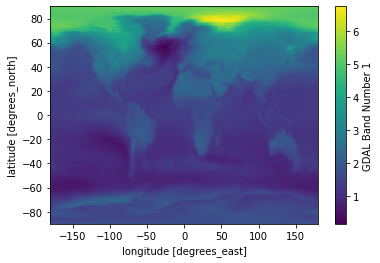

In [4]:
f0.t_anom.plot()

In [5]:
t126 = f0.t_anom
t585 = f1.t_anom

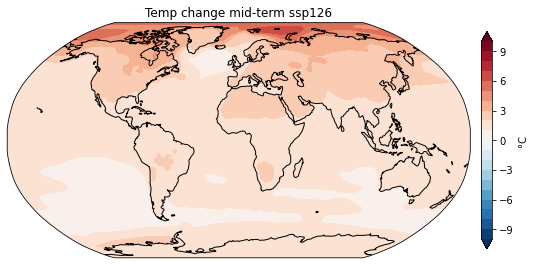

In [6]:
fig=plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.Robinson())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,)
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -45, 0, 45, 90])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

levels = np.linspace(-10,10, 21)  # 21 levels

cs1  = ax.contourf(t126.lon, t126.lat, t126, levels=levels, cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree()) 
cbar = plt.colorbar(cs1,location='right',shrink=0.4,pad=0.02,label='°C')
ax.coastlines()

plt.title('Temp change mid-term ssp126',loc='center',size=12);

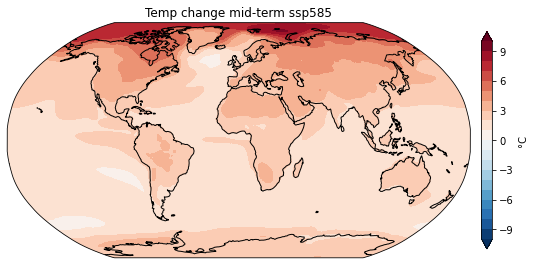

In [7]:
fig=plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.Robinson())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,)
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -45, 0, 45, 90])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

levels = np.linspace(-10,10, 21)  # 21 levels

cs1  = ax.contourf(t585.lon, t585.lat, t585, levels=levels, cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree()) 
cbar = plt.colorbar(cs1,location='right',shrink=0.4,pad=0.02,label='°C')
ax.coastlines()

plt.title('Temp change mid-term ssp585',loc='center',size=12);

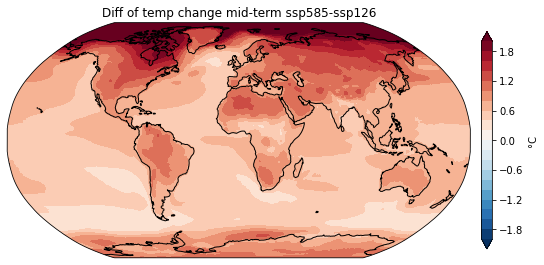

In [8]:
#Difference of the two projected temperatures
fig=plt.figure(figsize=[10,10])
ax = plt.axes(projection=ccrs.Robinson())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,)
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator([-180, -120, -60, 0, 60, 120, 180])
gl.ylocator = mticker.FixedLocator([-90, -45, 0, 45, 90])
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER

levels = np.linspace(-2,2, 21)  # 21 levels

cs1  = ax.contourf(t585.lon, t585.lat, t585-t126, levels=levels, cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree()) 
cbar = plt.colorbar(cs1,location='right',shrink=0.4,pad=0.02,label='°C')
ax.coastlines()

plt.title('Diff of temp change mid-term ssp585-ssp126',loc='center',size=12);

In [28]:
# time series of IPCC projections ssp126
# Load the CSV
df1 = pd.read_csv("t-CMIP6_timeseries_ssp126.csv")

In [29]:
df1

,Year,IPSL_IPSL-CM5A2-INCA_r1i1p1f1,MIROC_MIROC-ES2L_r1i1p1f2,INM_INM-CM5-0_r1i1p1f1,AWI_AWI-CM-1-1-MR_r1i1p1f1,MRI_MRI-ESM2-0_r1i1p1f1,MOHC_UKESM1-0-LL_r1i1p1f2,KIOST_KIOST-ESM_r1i1p1f1,CNRM-CERFACS_CNRM-CM6-1-HR_r1i1p1f2,MOHC_HadGEM3-GC31-MM_r1i1p1f3,...,CAS_FGOALS-g3_r1i1p1f1,IPSL_IPSL-CM6A-LR_r1i1p1f1,CMCC_CMCC-ESM2_r1i1p1f1,CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1,CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2,INM_INM-CM4-8_r1i1p1f1,MPI-M_MPI-ESM1-2-LR_r1i1p1f1,CCCR-IITM_IITM-ESM_r1i1p1f1,NOAA-GFDL_GFDL-ESM4_r1i1p1f1,MIROC_MIROC6_r1i1p1f1
0,1850,-0.36669,-0.25744,-0.26682,-0.43351,-0.13474,0.12796,0.00738,-0.57825,-0.02694,...,-0.19829,-0.76807,-0.44296,-0.02977,-0.20144,-0.30465,-0.39193,-0.41005,-0.22619,-0.28340
1,1851,-0.45827,-0.09838,-0.29479,-0.47640,-0.08226,0.13655,-0.07285,-0.64777,0.03161,...,-0.40398,-0.58680,-0.33952,-0.02041,-0.24714,-0.32931,-0.41121,-0.54354,-0.31186,-0.32130
2,1852,-0.56698,-0.17209,-0.32752,-0.46741,-0.16285,0.24292,-0.14070,-0.60563,-0.07375,...,-0.33439,-0.59752,-0.43884,0.13590,-0.26945,-0.30793,-0.40450,-0.46194,-0.10316,-0.29861
3,1853,-0.55624,-0.35570,-0.28772,-0.40876,-0.26660,0.29086,-0.24671,-0.56910,-0.17897,...,-0.32593,-0.52247,-0.45763,0.03190,-0.25845,-0.32318,-0.05620,-0.37828,-0.05629,-0.24630
4,1854,-0.36432,-0.34170,-0.30312,-0.22947,-0.30661,0.21366,-0.41088,-0.58178,-0.01176,...,-0.37958,-0.42781,-0.43781,0.10121,-0.25492,-0.35692,-0.19088,-0.31084,-0.26622,0.01648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2096,4.30402,1.49433,1.01451,1.49535,1.51784,2.72706,1.11798,2.10993,2.80811,...,1.07016,1.60788,2.50024,2.47059,1.96538,1.06626,1.00726,1.07111,1.08913,1.10523
247,2097,4.23552,1.62248,1.06506,1.39369,1.43997,2.65555,1.11500,2.14812,2.65626,...,1.01686,1.63797,2.61760,2.26563,1.81061,1.04837,1.12965,1.00211,1.35539,1.19164
248,2098,4.30673,1.16348,1.07890,1.45286,1.39405,2.70258,1.42484,2.22134,2.63920,...,0.92154,1.89245,2.46210,2.28872,1.98298,1.07261,1.22146,0.72794,1.21611,1.42438
249,2099,4.58948,1.08617,1.07915,1.46336,1.45009,2.88801,1.22949,2.23528,2.65513,...,1.00257,1.93149,2.39516,2.31641,1.83510,1.02532,1.18004,0.87674,1.23545,1.60393


In [30]:
# Check the column names
print(df1.columns)

Index(['Year', 'IPSL_IPSL-CM5A2-INCA_r1i1p1f1', 'MIROC_MIROC-ES2L_r1i1p1f2',
       'INM_INM-CM5-0_r1i1p1f1', 'AWI_AWI-CM-1-1-MR_r1i1p1f1',
       'MRI_MRI-ESM2-0_r1i1p1f1', 'MOHC_UKESM1-0-LL_r1i1p1f2',
       'KIOST_KIOST-ESM_r1i1p1f1', 'CNRM-CERFACS_CNRM-CM6-1-HR_r1i1p1f2',
       'MOHC_HadGEM3-GC31-MM_r1i1p1f3', 'MOHC_HadGEM3-GC31-LL_r1i1p1f3',
       'NCC_NorESM2-MM_r1i1p1f1', 'CNRM-CERFACS_CNRM-ESM2-1_r1i1p1f2',
       'CAS_FGOALS-g3_r1i1p1f1', 'IPSL_IPSL-CM6A-LR_r1i1p1f1',
       'CMCC_CMCC-ESM2_r1i1p1f1', 'CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1',
       'CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2', 'INM_INM-CM4-8_r1i1p1f1',
       'MPI-M_MPI-ESM1-2-LR_r1i1p1f1', 'CCCR-IITM_IITM-ESM_r1i1p1f1',
       'NOAA-GFDL_GFDL-ESM4_r1i1p1f1', 'MIROC_MIROC6_r1i1p1f1'],
      dtype='object')


In [31]:
# basic info
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 251 non-null    int64  
 1   IPSL_IPSL-CM5A2-INCA_r1i1p1f1        251 non-null    float64
 2   MIROC_MIROC-ES2L_r1i1p1f2            251 non-null    float64
 3   INM_INM-CM5-0_r1i1p1f1               251 non-null    float64
 4   AWI_AWI-CM-1-1-MR_r1i1p1f1           251 non-null    float64
 5   MRI_MRI-ESM2-0_r1i1p1f1              251 non-null    float64
 6   MOHC_UKESM1-0-LL_r1i1p1f2            251 non-null    float64
 7   KIOST_KIOST-ESM_r1i1p1f1             251 non-null    float64
 8   CNRM-CERFACS_CNRM-CM6-1-HR_r1i1p1f2  251 non-null    float64
 9   MOHC_HadGEM3-GC31-MM_r1i1p1f3        251 non-null    float64
 10  MOHC_HadGEM3-GC31-LL_r1i1p1f3        251 non-null    float64
 11  NCC_NorESM2-MM_r1i1p1f1         

In [32]:
# convert all model values to float64
df1.iloc[:, 1:] = df1.iloc[:, 1:].apply(pd.to_numeric, errors='coerce', downcast='float')


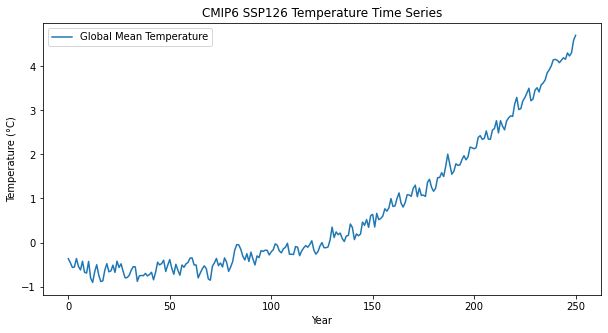

In [33]:
plt.figure(figsize=(10,5))
plt.plot(df1.index, df1['IPSL_IPSL-CM5A2-INCA_r1i1p1f1'], label='Global Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('CMIP6 SSP126 Temperature Time Series')
plt.legend()
plt.show()

In [34]:
df1['Ensemble mean']=df1.iloc[:, 1:].mean(axis=1)

<AxesSubplot:>

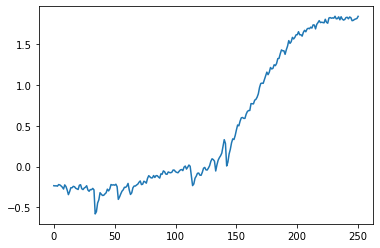

In [35]:
df1['Ensemble mean'].plot()

In [36]:
# --- Compute 25th and 75th percentiles ---
df1['Percentile_25'] = df1.iloc[:, 1:-1].quantile(0.25, axis=1)
df1['Percentile_75'] = df1.iloc[:, 1:-1].quantile(0.75, axis=1)

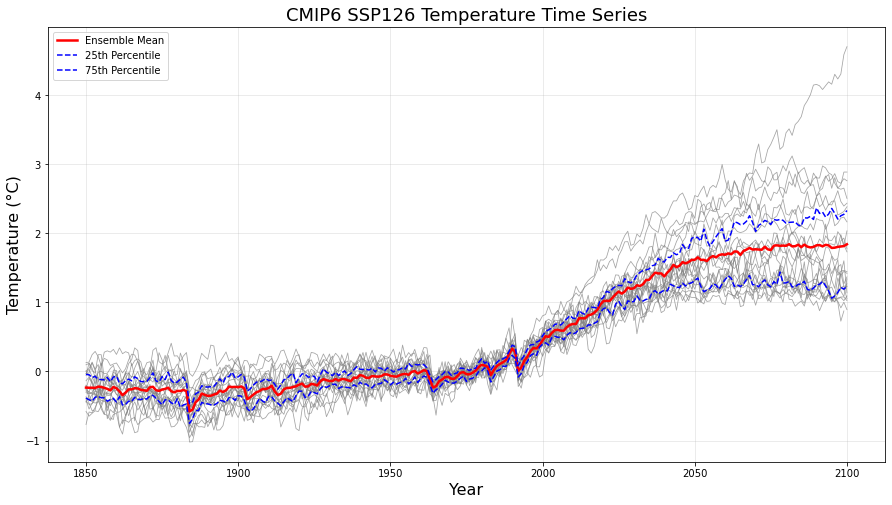

In [47]:
# --- Plot ---
plt.figure(figsize=(15,8))

# Plot all individual models (thin gray lines)
for col in df1.columns[1:-1]:  # all model columns except year and ensemble mean
    plt.plot(df1['Year'], df1[col], color='gray', linewidth=0.8, alpha=0.7)
    

# Plot ensemble mean (thick red line)
plt.plot(df1['Year'], df1['Ensemble mean'], color='red', linewidth=2.5, label='Ensemble Mean')
# Plot 25th and 75th percentile (thin blue lines)
plt.plot(df1['Year'], df1['Percentile_25'], color='blue', linewidth=1.5, linestyle='--', label='25th Percentile')
plt.plot(df1['Year'], df1['Percentile_75'], color='blue', linewidth=1.5, linestyle='--', label='75th Percentile')

# Labels and title
plt.xlabel("Year", fontsize=16) 
plt.ylabel("Temperature (°C)", fontsize=16)  
plt.title("CMIP6 SSP126 Temperature Time Series", fontsize=18)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

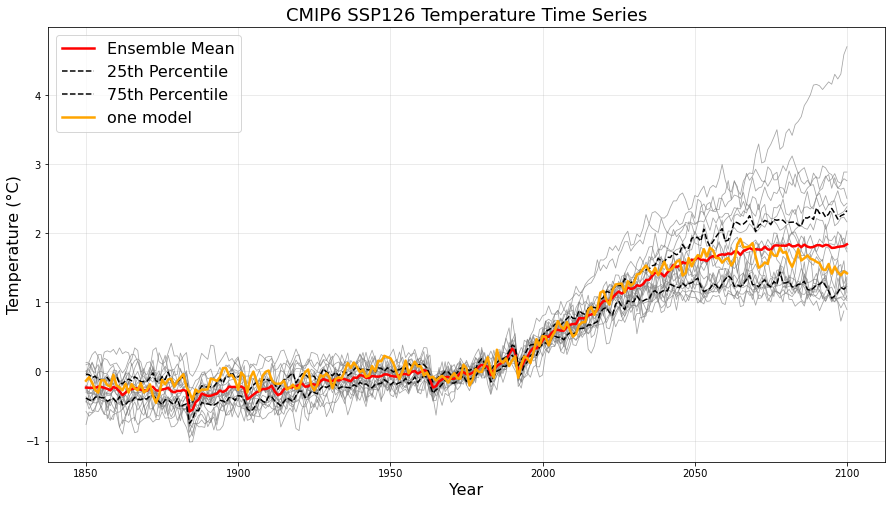

In [48]:
# Let's highlight the MRI_MRI-ESM2-0_r1i1p1f1 model

# --- Plot ---
plt.figure(figsize=(15,8))

# Plot all individual models (thin gray lines)
for col in df1.columns[1:-1]:  # all model columns except year and ensemble mean
    plt.plot(df1['Year'], df1[col], color='gray', linewidth=0.8, alpha=0.7)
    

# Plot ensemble mean (thick red line)
plt.plot(df1['Year'], df1['Ensemble mean'], color='red', linewidth=2.5, label='Ensemble Mean')
# Plot 25th and 75th percentile (thin blue lines)
plt.plot(df1['Year'], df1['Percentile_25'], color='black', linewidth=1.5, linestyle='--', label='25th Percentile')
plt.plot(df1['Year'], df1['Percentile_75'], color='black', linewidth=1.5, linestyle='--', label='75th Percentile')

# Plot the MRI_MRI-ESM2-0_r1i1p1f1 model
plt.plot(df1['Year'], df1['MRI_MRI-ESM2-0_r1i1p1f1'], color='orange', linewidth=2.5, label='one model')


# Labels and title
plt.xlabel("Year", fontsize=16) 
plt.ylabel("Temperature (°C)", fontsize=16)  
plt.title("CMIP6 SSP126 Temperature Time Series", fontsize=18)
plt.legend(fontsize=16)
plt.grid(alpha=0.3)

plt.show()

In [43]:
# time series of IPCC projections ssp585
# Load the CSV
df2 = pd.read_csv("t-CMIP6_timeseries_ssp585.csv")
df2['Ensemble mean'] = df2.iloc[:, 1:].mean(axis=1)
df2['Percentile_25'] = df2.iloc[:, 1:-1].quantile(0.25, axis=1)
df2['Percentile_75'] = df2.iloc[:, 1:-1].quantile(0.75, axis=1)
# convert all model values to float64
df2.iloc[:, 1:] = df2.iloc[:, 1:].apply(pd.to_numeric, errors='coerce', downcast='float')


/home/kbellomo/work/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [44]:
df2

,Year,INM_INM-CM5-0_r1i1p1f1,AWI_AWI-CM-1-1-MR_r1i1p1f1,MOHC_UKESM1-0-LL_r1i1p1f2,MOHC_HadGEM3-GC31-MM_r1i1p1f3,NCC_NorESM2-MM_r1i1p1f1,CNRM-CERFACS_CNRM-CM6-1_r1i1p1f2,CCCR-IITM_IITM-ESM_r1i1p1f1,NOAA-GFDL_GFDL-ESM4_r1i1p1f1,MRI_MRI-ESM2-0_r1i1p1f1,...,AS-RCEC_TaiESM1_r1i1p1f1,NIMS-KMA_KACE-1-0-G_r1i1p1f1,MOHC_HadGEM3-GC31-LL_r1i1p1f3,CSIRO-ARCCSS_ACCESS-CM2_r1i1p1f1,INM_INM-CM4-8_r1i1p1f1,IPSL_IPSL-CM6A-LR_r1i1p1f1,MIROC_MIROC-ES2L_r1i1p1f2,Ensemble mean,Percentile_25,Percentile_75
0,1850,-0.26682,-0.43351,0.12796,-0.02694,0.09700,-0.20144,-0.41005,-0.22619,-0.13474,...,-0.08407,-0.53234,0.00552,-0.02977,-0.30465,-0.76807,-0.25744,-0.256142,-0.423115,-0.070140
1,1851,-0.29479,-0.47640,0.13655,0.03161,0.11671,-0.24714,-0.54354,-0.31186,-0.08226,...,0.04559,-0.56194,0.04608,-0.02041,-0.32931,-0.58680,-0.09838,-0.241753,-0.430800,-0.046630
2,1852,-0.32752,-0.46741,0.24292,-0.07375,0.01234,-0.26945,-0.46194,-0.10316,-0.16285,...,0.05414,-0.51292,0.12684,0.13590,-0.30793,-0.59752,-0.17209,-0.245797,-0.450825,-0.088455
3,1853,-0.28772,-0.40876,0.29086,-0.17897,-0.01830,-0.25845,-0.37828,-0.05629,-0.26660,...,0.07104,-0.46554,0.01208,0.03190,-0.32318,-0.52247,-0.35570,-0.239337,-0.387538,-0.069820
4,1854,-0.30312,-0.22947,0.21366,-0.01176,0.24380,-0.25492,-0.31084,-0.26622,-0.30661,...,0.08014,-0.54699,-0.14887,0.10121,-0.35692,-0.42781,-0.34170,-0.237556,-0.402240,-0.115740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2096,3.49312,4.53160,7.30200,6.39486,3.94127,5.85742,3.37878,3.85150,4.48446,...,6.14521,5.55577,6.69448,5.82314,3.62093,6.00522,4.40288,5.158490,4.056673,5.931320
247,2097,3.63749,4.65653,7.30135,6.48448,4.28960,6.05448,3.36398,3.63910,4.70221,...,6.12033,5.64106,6.89673,5.78878,3.70656,5.89331,4.27629,5.195646,4.279617,5.900120
248,2098,3.67753,4.63221,7.46376,6.45583,4.12348,6.10093,3.45365,3.93483,4.39520,...,6.05392,5.71684,6.83340,5.97759,3.70752,6.12725,4.11270,5.269274,4.217772,6.015755
249,2099,3.76056,4.78629,7.29681,6.62351,4.15552,6.21266,3.23761,4.13026,4.50000,...,6.38565,5.83581,6.96159,6.08247,3.62838,6.36692,4.19490,5.357357,4.165365,6.147565


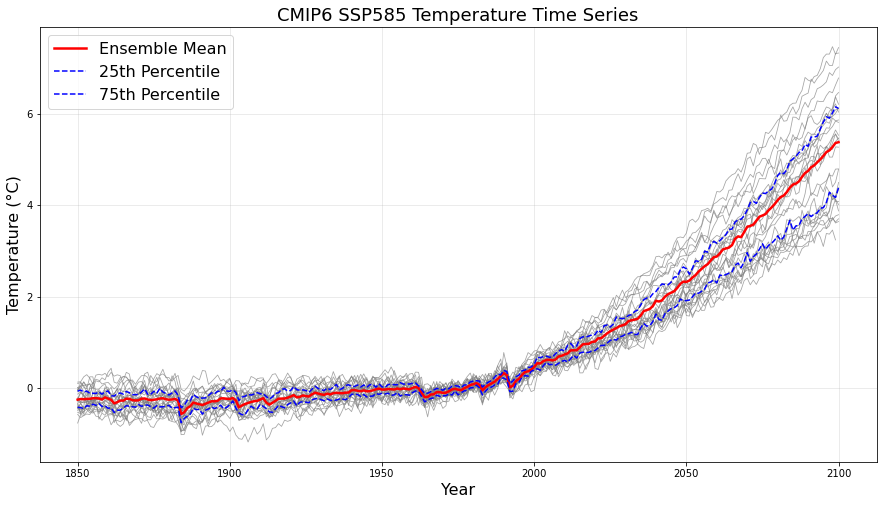

In [49]:
# --- Plot ---
plt.figure(figsize=(15,8))

# Plot all individual models (thin gray lines)
for col in df2.columns[1:-1]:  # all model columns except year and ensemble mean
    plt.plot(df2['Year'], df2[col], color='gray', linewidth=0.8, alpha=0.7)
    

# Plot ensemble mean (thick red line)
plt.plot(df2['Year'], df2['Ensemble mean'], color='red', linewidth=2.5, label='Ensemble Mean')
# Plot 25th and 75th percentile (thin blue lines)
plt.plot(df2['Year'], df2['Percentile_25'], color='blue', linewidth=1.5, linestyle='--', label='25th Percentile')
plt.plot(df2['Year'], df2['Percentile_75'], color='blue', linewidth=1.5, linestyle='--', label='75th Percentile')

# Labels and title
plt.xlabel("Year", fontsize=16) 
plt.ylabel("Temperature (°C)", fontsize=16)  
plt.title("CMIP6 SSP585 Temperature Time Series", fontsize=18)
plt.legend(fontsize=16)
plt.grid(alpha=0.3)

plt.show()

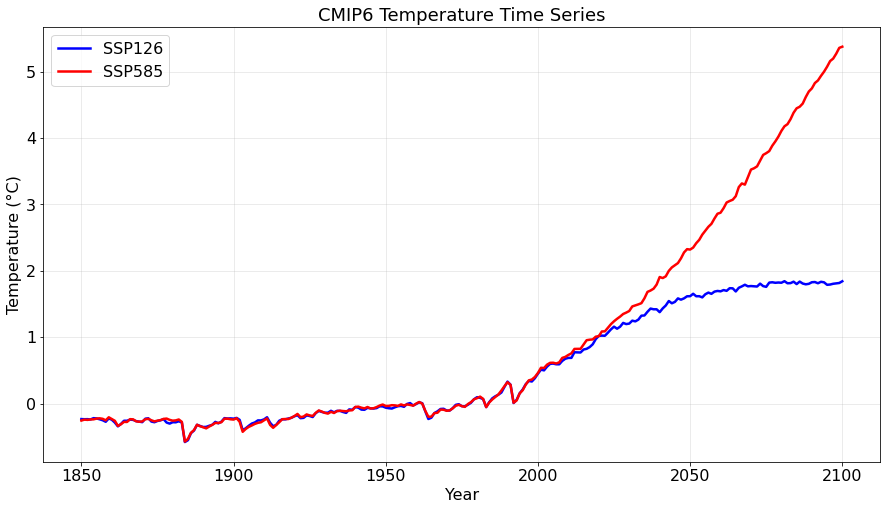

In [52]:
# Compare SSP126 and SSP585
# --- Plot ---
plt.figure(figsize=(15,8))

# Plot ensemble mean (thick blue line) of SSP126
plt.plot(df1['Year'], df1['Ensemble mean'], color='blue', linewidth=2.5, label='SSP126')

# Plot ensemble mean (thick red line) of SSP585
plt.plot(df2['Year'], df2['Ensemble mean'], color='red', linewidth=2.5, label='SSP585')

# Labels and title
plt.xlabel("Year", fontsize=16) 
plt.ylabel("Temperature (°C)", fontsize=16)  
plt.title("CMIP6 Temperature Time Series", fontsize=18)
plt.legend(fontsize=16)
plt.grid(alpha=0.3)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [60]:
# Estimate the temperature difference at year 2026, 2050, 2100

year=2100
ssp126_year = df1.loc[df1['Year'] == year, 'Ensemble mean'].values[0]
print(ssp126_year)

ssp585_year = df2.loc[df2['Year'] == year, 'Ensemble mean'].values[0]
print(ssp585_year)

print("Difference in global mean temperature ssp585 - ssp126 at year ",year,"is: ",ssp585_year-ssp126_year," °C")



1.8419564
5.3752527
Difference in global mean temperature ssp585 - ssp126 at year  2100 is:  3.5332963  °C
